<a href="https://colab.research.google.com/github/MAboElFottouh/The-Sparks-Foundation/blob/main/task2_unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization

In [5]:
data = pd.read_csv('/content/Iris.csv')

In [6]:
print('\nNumber of rows and columns in the data set: ',data.shape)
#Lets look into top few rows and columns in the dataset
data.head()


Number of rows and columns in the data set:  (150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.drop(['Id','Species'],axis=1,inplace=True) #drop Id and Species

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [9]:
data.isna().sum() #check null

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

# Visualization

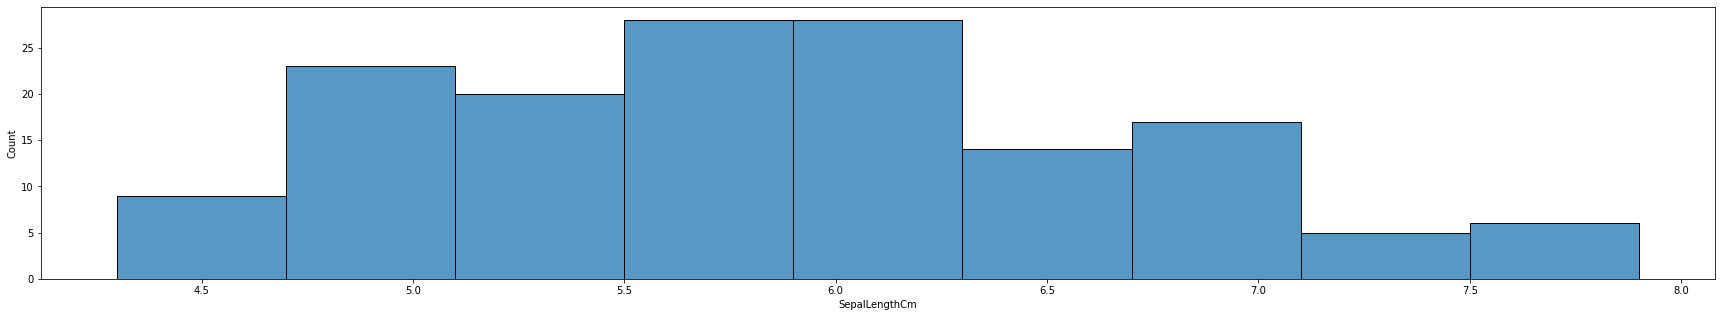

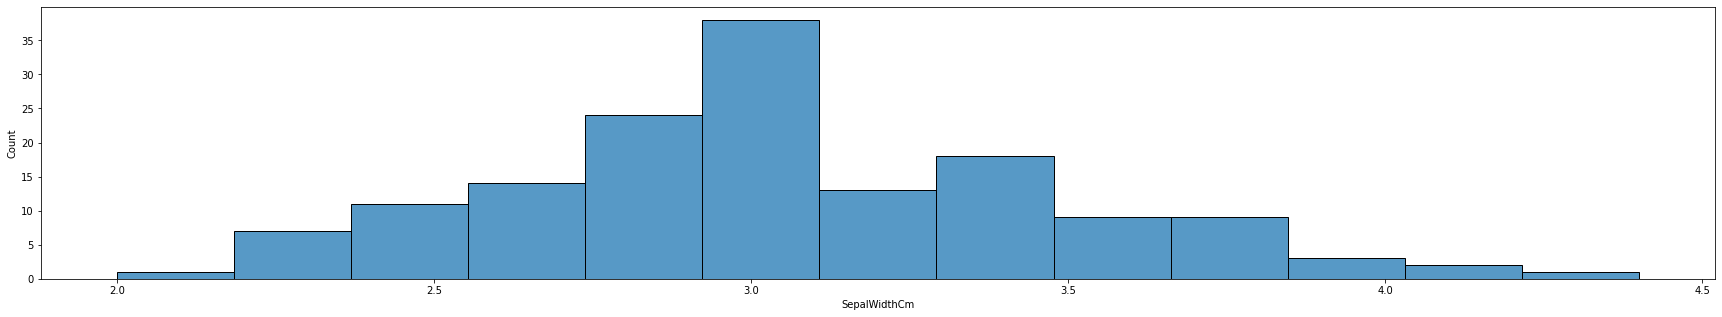

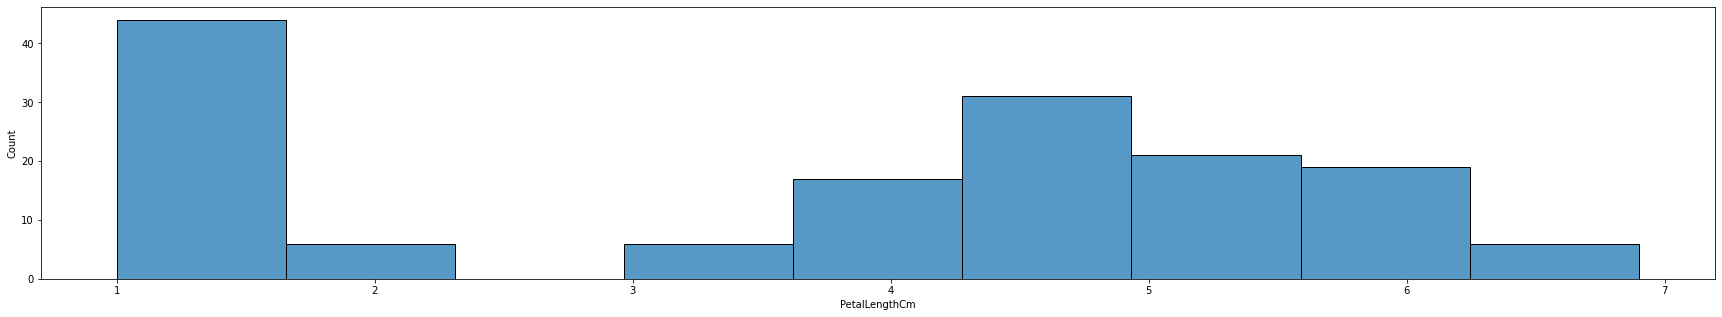

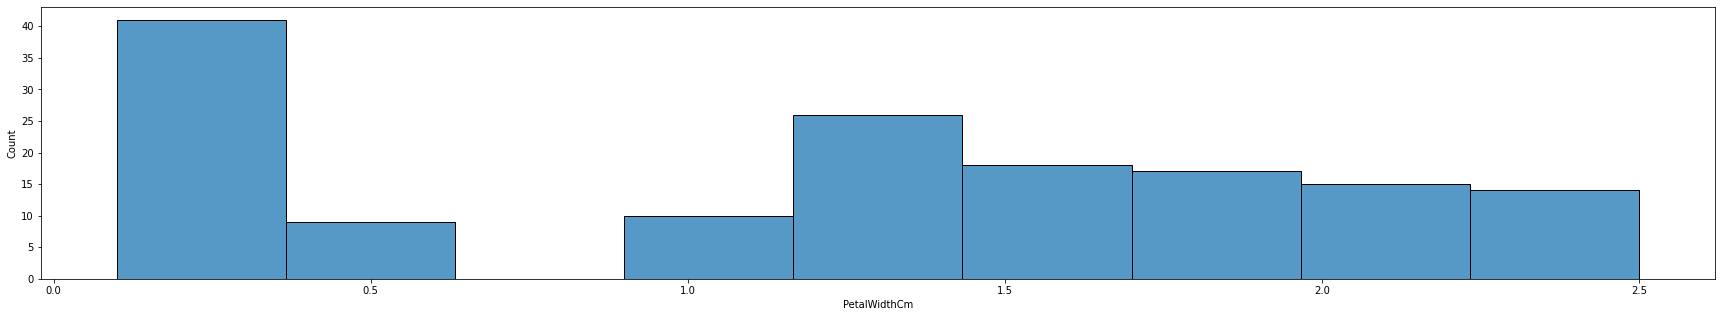

In [10]:
# Visualization all columns
for columns in data.columns:
    plt.figure(figsize=(30,5))
    sns.histplot(data[columns])
    plt.show()

In [11]:
X=data.values

In [12]:
#Normalizer to make all data in range 0 to 1 
from sklearn.preprocessing import Normalizer
nor=Normalizer()
X=nor.fit_transform(X)

# K_means 

In [13]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,15):
    model=KMeans(n_clusters=i,init='k-means++')
    model.fit(X)
    wcss.append(model.inertia_)

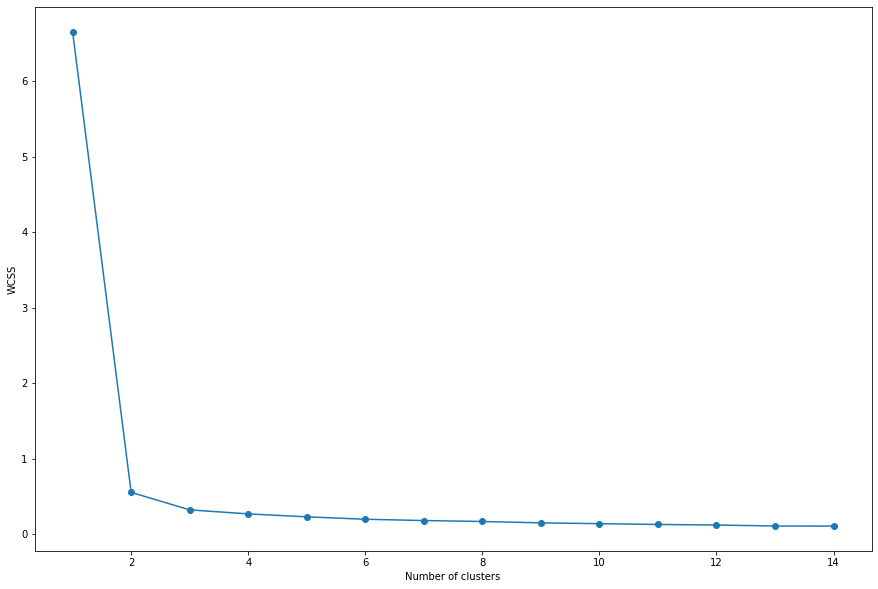

In [14]:
#plo elbow method

plt.figure(figsize=(15,10))
plt.plot(range(1,15),wcss,marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [15]:

model=KMeans(n_clusters=3,init='k-means++')
model.fit(X)

KMeans(n_clusters=3)

In [16]:
y_pred=model.predict(X)

In [17]:
cluster_data=pd.DataFrame(X,columns=data.columns)
cluster_data['cluster']=y_pred
cluster_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
0,0.803773,0.551609,0.220644,0.031521,1
1,0.828133,0.507020,0.236609,0.033801,1
2,0.805333,0.548312,0.222752,0.034269,1
3,0.800030,0.539151,0.260879,0.034784,1
4,0.790965,0.569495,0.221470,0.031639,1


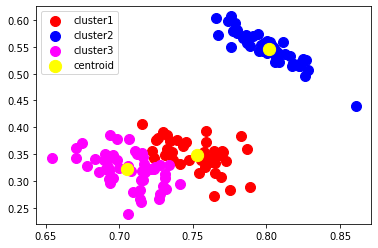

In [18]:
plt.scatter(X[y_pred==0,0],X[y_pred==0,1],s=100,c='red',label='cluster1')
plt.scatter(X[y_pred==1,0],X[y_pred==1,1],s=100,c='blue',label='cluster2')
plt.scatter(X[y_pred==2,0],X[y_pred==2,1],s=100,c='magenta',label='cluster3')


plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=150,c='yellow',label='centroid')
plt.legend()

In [19]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X, model.labels_, metric='euclidean')

In [20]:
score

0.5761482778389391